# (KNN Classifier)--PartA
## Handwritten digit recognition
In this assignment partA, we will use the built-in library ``sklearn`` to use KNN classifier.

## The MNIST dataset
`MNIST` is a classic dataset in machine learning, consisting of 28x28 gray-scale images handwritten digits. The training set contains 60,000 examples and the test set contains 10,000 examples. In this assignment we will further split the training set to take out 12,000 examples as a validation step.

In [1]:
%matplotlib inline
import gzip, os
import numpy as np
import matplotlib.pyplot as plt
import time
from urllib.request import urlretrieve

In [2]:
# Function that downloads a specified MNIST data file from Yann Le Cun's website
def download(filename, source='http://yann.lecun.com/exdb/mnist/'):
    print("Downloading %s" % filename)
    urlretrieve(source + filename, filename)

# Invokes download() if necessary, then reads in images
def load_mnist_images(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1,784)
    return data

def load_mnist_labels(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data

In [3]:
## Load the training set
train_data = load_mnist_images('train-images-idx3-ubyte.gz')
train_labels = load_mnist_labels('train-labels-idx1-ubyte.gz')

## Load the testing set
test_data = load_mnist_images('t10k-images-idx3-ubyte.gz')
test_labels = load_mnist_labels('t10k-labels-idx1-ubyte.gz')

In [4]:
## Print out their dimensions
print("Training dataset dimensions: ", np.shape(train_data))
print("Number of training labels: ", len(train_labels))
print("Testing dataset dimensions: ", np.shape(test_data))
print("Number of testing labels: ", len(test_labels))

Training dataset dimensions:  (60000, 784)
Number of training labels:  60000
Testing dataset dimensions:  (10000, 784)
Number of testing labels:  10000


In [5]:
## Compute the number of examples of each digit
train_digits, train_counts = np.unique(train_labels, return_counts=True)
print("Training set distribution:")
print(dict(zip(train_digits, train_counts)))

test_digits, test_counts = np.unique(test_labels, return_counts=True)
print("Test set distribution:")
print(dict(zip(test_digits, test_counts)))

Training set distribution:
{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test set distribution:
{0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


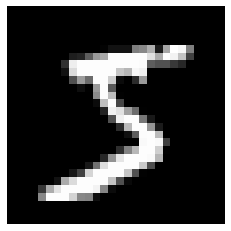

Label 5


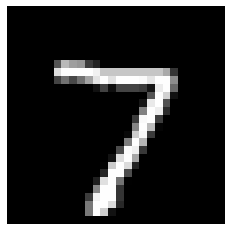

Label 7


In [6]:
## Define a function that displays a digit given its vector representation
def show_digit(x):
    plt.axis('off')
    plt.imshow(x.reshape((28,28)), cmap=plt.cm.gray)
    plt.show()
    return

## Define a function that takes an index into a particular data set ("train" or "test") and displays that image.
def vis_image(index, dataset="train"):
    if(dataset=="train"): 
        show_digit(train_data[index,])
        label = train_labels[index]
    else:
        show_digit(test_data[index,])
        label = test_labels[index]
    print("Label " + str(label))
    return

## View the first data point in the training set
vis_image(0, "train")

## Now view the first data point in the test set
vis_image(0, "test")

## Splitting the Train data to Train and Validate Sets

In [7]:
from sklearn.model_selection import train_test_split
trainx, valx, trainy, valy = train_test_split(train_data, train_labels, test_size=0.20, random_state=42)

## 1. K-Nearest neighbor classifier--Brute Force Approach

Use the built-in KNN classifier to perform handwritten digit classification task. Please keep in mind that any hyper-parameter selection shall be performed on the independent validation set and not on the test set. You need to study the KNeighborsClassifier documentation to understand how to use the api with different parameters. In this set of experiments, you need to select 'brute' for the **algorithm** parameter. Record the error rates on the test set and the cpu time taken for evaluation.

**Note:** Here you don't have to implement the KNN classifier but you just need to use it from ``sklearn`` library.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [9]:

### START CODE HERE ###
clf1 = KNeighborsClassifier(algorithm = "brute")
clf1.fit(trainx,trainy)
print(clf1)
y_val = clf1.predict(valx)
print(classification_report(valy, y_val))
clf1.get_params()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
clf1_gscv = GridSearchCV(clf1, param_grid, cv=5)

clf1_gscv.fit(valx,valy)

#check top performing n_neighbors value
print("the best K is ",clf1_gscv.best_params_)


KNeighborsClassifier(algorithm='brute')
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1175
           1       0.95      1.00      0.97      1322
           2       0.98      0.96      0.97      1174
           3       0.96      0.97      0.97      1219
           4       0.98      0.97      0.97      1176
           5       0.96      0.97      0.97      1104
           6       0.98      0.99      0.99      1177
           7       0.97      0.97      0.97      1299
           8       0.99      0.93      0.96      1160
           9       0.96      0.96      0.96      1194

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000

the best K is  {'n_neighbors': 1}


In [10]:
#update k value
clf1.set_params(**clf1_gscv.best_params_)
clf1.fit(trainx,trainy)
y_expect = test_labels
start_time = time.time()
y_pred = clf1.predict(test_data)
print(classification_report(y_expect, y_pred))
print("--- %s seconds ---" % (time.time() - start_time))
### END CODE HERE ###


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.96      0.99      0.98      1135
           2       0.99      0.96      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.96      0.96       982
           5       0.95      0.97      0.96       892
           6       0.98      0.98      0.98       958
           7       0.96      0.97      0.96      1028
           8       0.98      0.94      0.96       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

--- 9.798798322677612 seconds ---


## 2. Faster nearest neighbor methods

Performing nearest neighbor classification in the way we have presented requires a full pass through the training set in order to classify a single point. If there are $N$ training points in $\mathbb{R}^d$, this takes $O(N d)$ time.

Fortunately, there are faster methods to perform nearest neighbor look up if we are willing to spend some time preprocessing the training set. `scikit-learn` has fast implementations of two useful nearest neighbor data structures: the _ball tree_ and the _k-d tree_. Record the error rates on the test set and the cpu time taken for evaluation using these two faster methods.

**Note:** You need to select 'ball_tree'or 'kd_tree' for the **algorithm** parameter for ``KNeighborsClassifier`` classifier.

In [11]:
# You can use KNeighborsClassifier with correct values for 'algorithm'
### START CODE HERE ###
clf2 = KNeighborsClassifier(algorithm = "kd_tree")
#update k value
clf2.set_params(**clf1_gscv.best_params_)
clf2.fit(trainx,trainy)


y_expect = test_labels
start_time = time.time()
y_pred = clf2.predict(test_data)
print(classification_report(y_expect, y_pred))
print("--- %s seconds ---" % (time.time() - start_time))

### END CODE HERE ###

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.96      0.99      0.98      1135
           2       0.99      0.96      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.96      0.96       982
           5       0.95      0.97      0.96       892
           6       0.98      0.98      0.98       958
           7       0.96      0.97      0.96      1028
           8       0.98      0.94      0.96       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

--- 531.2621214389801 seconds ---


In [12]:
# You can use KNeighborsClassifier with correct values for 'algorithm'
### START CODE HERE ###
clf3 = KNeighborsClassifier(algorithm = "ball_tree")
clf3.set_params(**clf1_gscv.best_params_)
clf3.fit(trainx,trainy)

y_expect = test_labels
start_time = time.time()
y_pred = clf3.predict(test_data)
print(classification_report(y_expect, y_pred))
print("--- %s seconds ---" % (time.time() - start_time))

### END CODE HERE ###

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.96      0.99      0.98      1135
           2       0.99      0.96      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.96      0.96       982
           5       0.95      0.97      0.96       892
           6       0.98      0.98      0.98       958
           7       0.96      0.97      0.96      1028
           8       0.98      0.94      0.96       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

--- 412.05068135261536 seconds ---


## 3. Record CPU time and accuracy for all the three approaches in different datasets

Use brute-force, kd-tree, and ball-tree approaches for the following datasets and record the accuracies and cpu time (for evaluation step only). Looking at the results, can you explain it.

Datasets:
1. Abalone Data Set (https://archive.ics.uci.edu/ml/datasets/abalone)
2. Statlog (Landsat Satellite) Data Set (https://archive.ics.uci.edu/ml/datasets/Statlog+(Landsat+Satellite))

**Note:** The datasets are provided as attachement in the assignment as CSV files.

## Abalone Data Set

In [13]:
import pandas as pd

In [15]:
# Abalone Data Set
### START CODE HERE ###
# from google.colab import drive
# drive.mount('/content/drive/')
# %cd /content/drive/My Drive/Colab Notebooks/

df = pd.read_csv('Abalone19.csv', header=None)
df.head() 

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [16]:
Y = df[8]
Y = Y.to_numpy()
Y, Y.shape

(array([15,  7,  9, ...,  9, 10, 12], dtype=int64), (4177,))

In [17]:
df[0].value_counts()

M    1528
I    1342
F    1307
Name: 0, dtype: int64

In [18]:
df = df.replace("M", 1)
df = df.replace("F", 2)
df = df.replace("I", 3)

df.head()

,0,1,2,3,4,5,6,7,8
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [19]:
X = df.drop([8], axis="columns")
X = X.to_numpy()
X, X.shape

(array([[1.    , 0.455 , 0.365 , ..., 0.2245, 0.101 , 0.15  ],
        [1.    , 0.35  , 0.265 , ..., 0.0995, 0.0485, 0.07  ],
        [2.    , 0.53  , 0.42  , ..., 0.2565, 0.1415, 0.21  ],
        ...,
        [1.    , 0.6   , 0.475 , ..., 0.5255, 0.2875, 0.308 ],
        [2.    , 0.625 , 0.485 , ..., 0.531 , 0.261 , 0.296 ],
        [1.    , 0.71  , 0.555 , ..., 0.9455, 0.3765, 0.495 ]]),
 (4177, 8))

In [20]:
# split data in 3 sets training, validation, test (70%, 15%, 15%)
trainx, X_rem, trainy, y_rem = train_test_split(X,Y, train_size=0.7)
valx, test_data, valy, test_labels = train_test_split(X_rem,y_rem, test_size=0.5)

In [21]:
#Brute Algo.
ds2_clf1 = KNeighborsClassifier(algorithm = "brute")
ds2_clf1.fit(trainx,trainy)
y_val = ds2_clf1.predict(valx)
print(classification_report(valy, y_val))
ds2_clf1.get_params()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
ds2_clf1_gscv = GridSearchCV(ds2_clf1, param_grid, cv=5)

ds2_clf1_gscv.fit(valx,valy)

#check top performing n_neighbors value
print("the best K is ",ds2_clf1_gscv.best_params_)
#update k value
ds2_clf1.set_params(**ds2_clf1_gscv.best_params_)
ds2_clf1.fit(trainx,trainy)

y_expect = test_labels
start_time = time.time()
y_pred = ds2_clf1.predict(test_data)
print(classification_report(y_expect, y_pred))
print("Brute Algo.--- %s seconds ---" % (time.time() - start_time))

E:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.43      0.75      0.55         8
           5       0.46      0.30      0.36        20
           6       0.23      0.34      0.28        29
           7       0.25      0.31      0.28        55
           8       0.32      0.44      0.37        87
           9       0.23      0.26      0.24       116
          10       0.25      0.33      0.28        92
          11       0.19      0.12      0.15        81
          12       0.12      0.07      0.09        40
          13       0.10      0.07      0.09        27
          14       0.17      0.06      0.08        18
          15       0.20      0.06      0.09        17
          16       0.17      0.10      0.12        10
          17       0.00      0.00      0.00         5
          18       0.00      0.00      0.00         7
          19       0.00    

E:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
#Brute Algo.
ds2_clf2 = KNeighborsClassifier(algorithm = "kd_tree")
ds2_clf2.fit(trainx,trainy)
y_val = ds2_clf2.predict(valx)
print(classification_report(valy, y_val))
ds2_clf2.get_params()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
ds2_clf2_gscv = GridSearchCV(ds2_clf2, param_grid, cv=5)

ds2_clf2_gscv.fit(valx,valy)

#check top performing n_neighbors value
print("the best K is ",ds2_clf2_gscv.best_params_)
#update k value
ds2_clf2.set_params(**ds2_clf2_gscv.best_params_)
ds2_clf2.fit(trainx,trainy)

y_expect = test_labels
start_time = time.time()
y_pred = ds2_clf2.predict(test_data)
print(classification_report(y_expect, y_pred))
print("kd_tree Algo.--- %s seconds ---" % (time.time() - start_time))

E:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.43      0.75      0.55         8
           5       0.46      0.30      0.36        20
           6       0.23      0.34      0.28        29
           7       0.25      0.31      0.28        55
           8       0.32      0.44      0.37        87
           9       0.23      0.26      0.24       116
          10       0.25      0.33      0.28        92
          11       0.19      0.12      0.15        81
          12       0.12      0.07      0.09        40
          13       0.10      0.07      0.09        27
          14       0.17      0.06      0.08        18
          15       0.20      0.06      0.09        17
          16       0.17      0.10      0.12        10
          17       0.00      0.00      0.00         5
          18       0.00      0.00      0.00         7
          19       0.00    

E:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
#Brute Algo.
ds2_clf3 = KNeighborsClassifier(algorithm = "ball_tree")
ds2_clf3.fit(trainx,trainy)
y_val = ds2_clf3.predict(valx)
print(classification_report(valy, y_val))
ds2_clf3.get_params()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
ds2_clf3_gscv = GridSearchCV(ds2_clf3, param_grid, cv=5)

ds2_clf3_gscv.fit(valx,valy)

#check top performing n_neighbors value
print("the best K is ",ds2_clf3_gscv.best_params_)
#update k value
ds2_clf3.set_params(**ds2_clf3_gscv.best_params_)
ds2_clf3.fit(trainx,trainy)

y_expect = test_labels
start_time = time.time()
y_pred = ds2_clf3.predict(test_data)
print(classification_report(y_expect, y_pred))
print("ball_tree Algo.--- %s seconds ---" % (time.time() - start_time))

E:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.43      0.75      0.55         8
           5       0.46      0.30      0.36        20
           6       0.23      0.34      0.28        29
           7       0.25      0.31      0.28        55
           8       0.32      0.44      0.37        87
           9       0.23      0.26      0.24       116
          10       0.25      0.33      0.28        92
          11       0.19      0.12      0.15        81
          12       0.12      0.07      0.09        40
          13       0.10      0.07      0.09        27
          14       0.17      0.06      0.08        18
          15       0.20      0.06      0.09        17
          16       0.17      0.10      0.12        10
          17       0.00      0.00      0.00         5
          18       0.00      0.00      0.00         7
          19       0.00    

E:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Statlog (Landsat Satellite) Data Set

In [24]:
# Statlog (Landsat Satellite) Data Set
### START CODE HERE ###
# from google.colab import drive
# drive.mount('/content/drive/')
# %cd /content/drive/My Drive/Colab Notebooks/

df = pd.read_csv('186_satimage.csv', header=None)
df.head() 

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,0.117596,1.241362,1.184036,0.815302,-0.158561,1.256483,1.193546,0.818486,-0.141965,0.879481,...,0.807707,-0.069968,1.219160,1.250463,0.597678,-0.054291,1.233342,1.262255,0.603258,1
1,-1.205362,-1.249654,-0.077532,0.444886,-0.895959,-0.447579,-0.786760,-0.554203,-0.364672,0.092157,...,-0.192752,-0.736996,-0.969292,-0.844805,-0.400030,-0.725852,-0.344432,-0.594534,-0.183967,5
2,0.779075,0.148811,0.042617,-0.243030,0.800057,0.164136,0.053370,-0.448612,0.154978,-0.345245,...,-0.877277,0.671174,-0.006373,-0.425752,-0.662584,0.691889,0.356801,-0.175259,-0.236449,7
3,1.146564,0.585831,0.342991,0.021553,0.947536,0.601074,0.353416,0.026550,1.788164,1.010702,...,0.281150,1.412317,1.044084,0.532085,0.282612,1.438068,1.058033,0.842981,0.130923,3
4,-0.764376,-1.162250,-0.137607,0.180303,-0.969698,-1.146681,-0.126658,0.184937,-0.735851,-1.132569,...,-0.192752,-0.885225,-1.231906,-0.784941,-0.347519,-0.875088,-1.220973,-0.774223,-0.551339,5


In [25]:
Y = df[36]
Y = Y.to_numpy()
Y, Y.shape

(array([1, 5, 7, ..., 4, 4, 3], dtype=int64), (6430,))

In [26]:
X = df.drop([36], axis="columns")
X = X.to_numpy()
X, X.shape

(array([[ 0.117596,  1.241362,  1.184036, ...,  1.233342,  1.262255,
          0.603258],
        [-1.205362, -1.249654, -0.077532, ..., -0.344432, -0.594534,
         -0.183967],
        [ 0.779075,  0.148811,  0.042617, ...,  0.356801, -0.175259,
         -0.236449],
        ...,
        [ 1.661048,  1.241362,  0.883663, ...,  0.093838, -0.295052,
         -0.761265],
        [ 0.117596, -0.200805, -0.858503, ..., -0.08147 , -0.534637,
         -0.551339],
        [ 1.661048,  1.41617 ,  1.36426 , ...,  1.145687,  0.783084,
          0.498294]]),
 (6430, 36))

In [27]:
# split data in 3 sets training, validation, test (70%, 15%, 15%)
trainx, X_rem, trainy, y_rem = train_test_split(X,Y, train_size=0.7)
valx, test_data, valy, test_labels = train_test_split(X_rem,y_rem, test_size=0.5)

In [28]:
#Brute Algo.
ds2_clf1 = KNeighborsClassifier(algorithm = "brute")
ds2_clf1.fit(trainx,trainy)
y_val = ds2_clf1.predict(valx)
print(classification_report(valy, y_val))
ds2_clf1.get_params()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
ds2_clf1_gscv = GridSearchCV(ds2_clf1, param_grid, cv=5)

ds2_clf1_gscv.fit(valx,valy)

#check top performing n_neighbors value
print("the best K is ",ds2_clf1_gscv.best_params_)
#update k value
ds2_clf1.set_params(**ds2_clf1_gscv.best_params_)
ds2_clf1.fit(trainx,trainy)

y_expect = test_labels
start_time = time.time()
y_pred = ds2_clf1.predict(test_data)
print(classification_report(y_expect, y_pred))
print("Brute Algo.--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           1       0.97      0.97      0.97       234
           2       0.98      0.98      0.98       114
           3       0.88      0.94      0.91       195
           4       0.69      0.59      0.63        99
           5       0.92      0.84      0.87       104
           7       0.86      0.90      0.88       218

    accuracy                           0.90       964
   macro avg       0.88      0.87      0.88       964
weighted avg       0.89      0.90      0.90       964

the best K is  {'n_neighbors': 2}
              precision    recall  f1-score   support

           1       0.97      0.98      0.98       224
           2       0.95      0.96      0.96       112
           3       0.83      0.96      0.89       204
           4       0.70      0.64      0.67       102
           5       0.86      0.83      0.84       100
           7       0.93      0.83      0.87       223

    accuracy                           0.89

In [29]:
#Brute Algo.
ds2_clf2 = KNeighborsClassifier(algorithm = "kd_tree")
ds2_clf2.fit(trainx,trainy)
y_val = ds2_clf2.predict(valx)
print(classification_report(valy, y_val))
ds2_clf2.get_params()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
ds2_clf2_gscv = GridSearchCV(ds2_clf2, param_grid, cv=5)

ds2_clf2_gscv.fit(valx,valy)

#check top performing n_neighbors value
print("the best K is ",ds2_clf2_gscv.best_params_)
#update k value
ds2_clf2.set_params(**ds2_clf2_gscv.best_params_)
ds2_clf2.fit(trainx,trainy)

y_expect = test_labels
start_time = time.time()
y_pred = ds2_clf2.predict(test_data)
print(classification_report(y_expect, y_pred))
print("kd_tree Algo.--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           1       0.97      0.97      0.97       234
           2       0.98      0.98      0.98       114
           3       0.88      0.94      0.91       195
           4       0.69      0.59      0.63        99
           5       0.92      0.84      0.87       104
           7       0.86      0.90      0.88       218

    accuracy                           0.90       964
   macro avg       0.88      0.87      0.88       964
weighted avg       0.89      0.90      0.90       964

the best K is  {'n_neighbors': 2}
              precision    recall  f1-score   support

           1       0.97      0.98      0.98       224
           2       0.95      0.96      0.96       112
           3       0.83      0.96      0.89       204
           4       0.70      0.64      0.67       102
           5       0.86      0.83      0.84       100
           7       0.93      0.83      0.87       223

    accuracy                           0.89

In [30]:
#Brute Algo.
ds2_clf3 = KNeighborsClassifier(algorithm = "ball_tree")
ds2_clf3.fit(trainx,trainy)
y_val = ds2_clf3.predict(valx)
print(classification_report(valy, y_val))
ds2_clf3.get_params()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
ds2_clf3_gscv = GridSearchCV(ds2_clf3, param_grid, cv=5)

ds2_clf3_gscv.fit(valx,valy)

#check top performing n_neighbors value
print("the best K is ",ds2_clf3_gscv.best_params_)
#update k value
ds2_clf3.set_params(**ds2_clf3_gscv.best_params_)
ds2_clf3.fit(trainx,trainy)

y_expect = test_labels
start_time = time.time()
y_pred = ds2_clf3.predict(test_data)
print(classification_report(y_expect, y_pred))
print("ball_tree Algo.--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           1       0.97      0.97      0.97       234
           2       0.98      0.98      0.98       114
           3       0.88      0.94      0.91       195
           4       0.69      0.59      0.63        99
           5       0.92      0.84      0.87       104
           7       0.86      0.90      0.88       218

    accuracy                           0.90       964
   macro avg       0.88      0.87      0.88       964
weighted avg       0.89      0.90      0.90       964

the best K is  {'n_neighbors': 2}
              precision    recall  f1-score   support

           1       0.97      0.98      0.98       224
           2       0.95      0.96      0.96       112
           3       0.83      0.96      0.89       204
           4       0.70      0.64      0.67       102
           5       0.86      0.83      0.84       100
           7       0.93      0.83      0.87       223

    accuracy                           0.89

## E1. Extra Stuff

You are invited to try some more ideas as extra work like:
1. Instead of using the pixels as features, implement your own features (example: what were presented in the slides) and use them for KNN. You need to keep in mind that if you compute features which have different scales then it is important to scale/normalize the features (discussed in the slides).

## Points to remember

You need to keep in mind the following points:
1. Use numpy arrays and numpy libraries for efficient computations. 